In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('fraudTrain.csv')

In [3]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
#remvoing useless columns
df.drop(['Unnamed: 0', 'first', 'last', 'job', 'dob', 'trans_num', 'city_pop', 'unix_time', 'street'], axis=1, inplace=True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,84735,37.7175,-112.4777,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,21790,39.2667,-77.5101,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,57756,43.3526,-102.5411,42.788940,-103.241160,0


In [5]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

<AxesSubplot: ylabel='Frequency'>

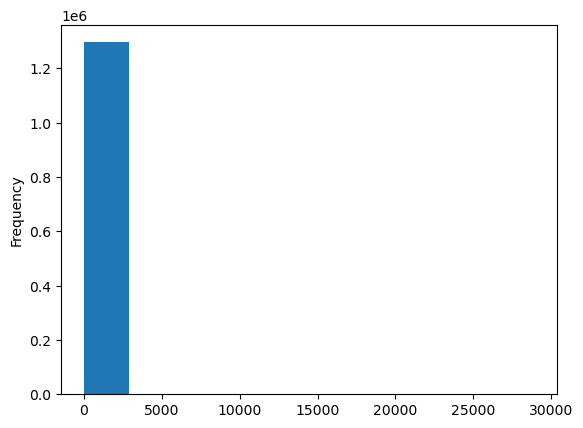

In [7]:
df['amt'].plot(kind='hist')

In [8]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

<AxesSubplot: >

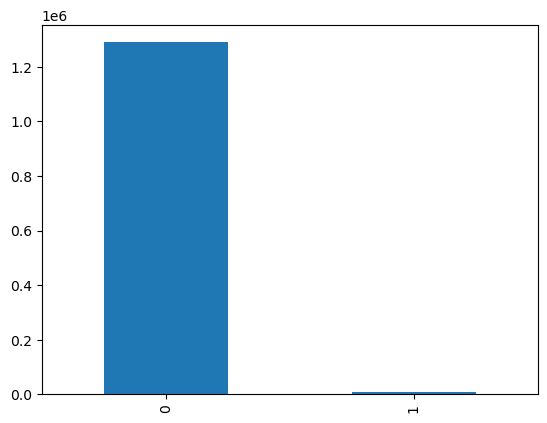

In [9]:
df["is_fraud"].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_fraud'>

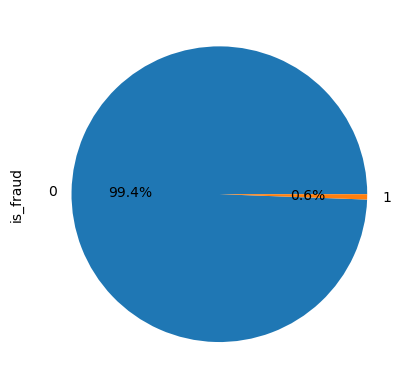

In [10]:
df["is_fraud"].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [11]:
df['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

<AxesSubplot: >

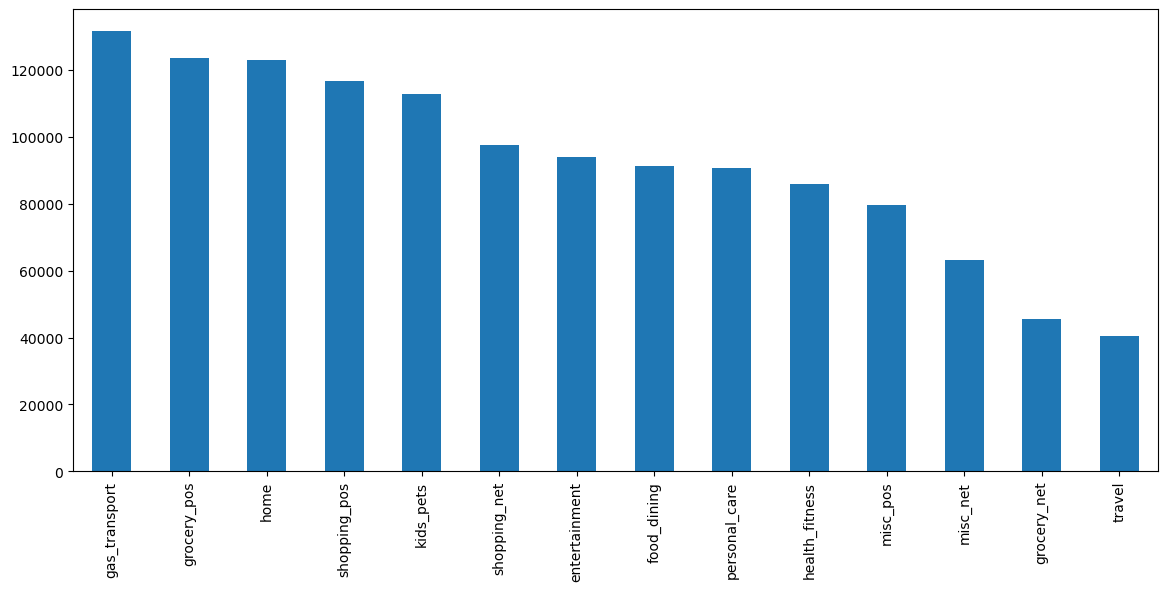

In [12]:
df['category'].value_counts().plot(kind='bar',figsize=(14,6))

In [13]:
df['gender'].value_counts()

F    709863
M    586812
Name: gender, dtype: int64

<AxesSubplot: >

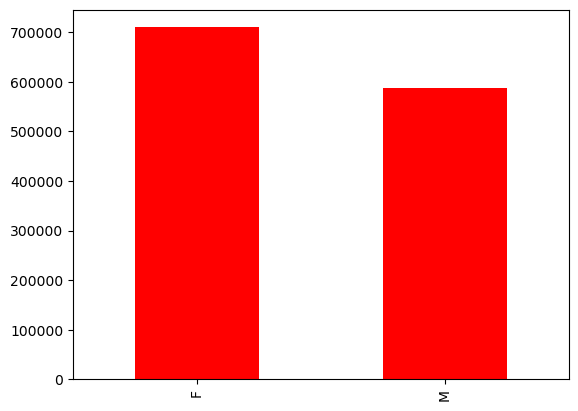

In [14]:
df['gender'].value_counts().plot(kind='bar',color='red')

In [15]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,84735,37.7175,-112.4777,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,21790,39.2667,-77.5101,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,57756,43.3526,-102.5411,42.788940,-103.241160,0


<AxesSubplot: xlabel='is_fraud', ylabel='category'>

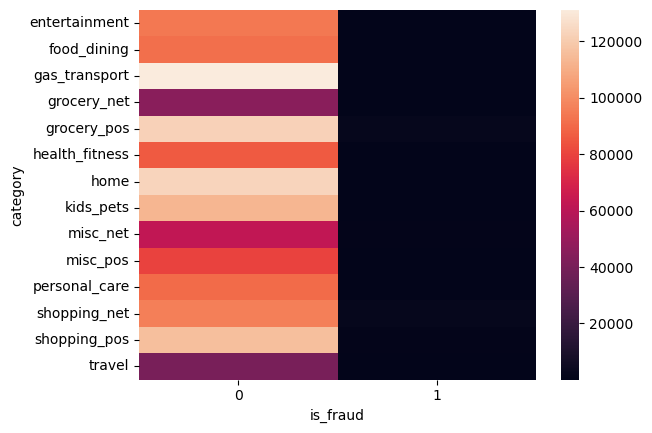

In [16]:
sns.heatmap(pd.crosstab(df['category'],df['is_fraud']))

In [17]:
(pd.crosstab(df['gender'],df['is_fraud']))

is_fraud,0,1
gender,,
F,706128,3735
M,583041,3771


<AxesSubplot: ylabel='Frequency'>

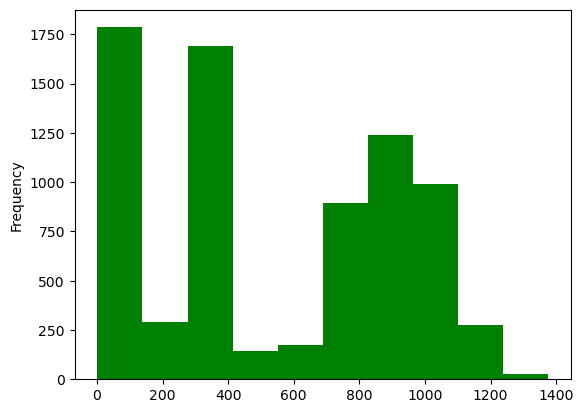

In [18]:
df[df['is_fraud']==1]['amt'].plot(kind='hist',color='green')


<AxesSubplot: ylabel='Frequency'>

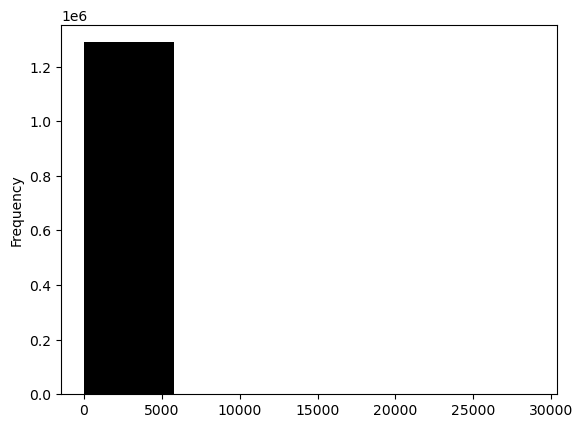

In [19]:
df[df['is_fraud']==0]['amt'].plot(kind='hist',color='black',bins=5)

In [20]:
df["trans_date_trans_time"]

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1296670    2020-06-21 12:12:08
1296671    2020-06-21 12:12:19
1296672    2020-06-21 12:12:32
1296673    2020-06-21 12:13:36
1296674    2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: object

In [21]:
df["new_datetime"]=pd.to_datetime(df["trans_date_trans_time"]).dt.to_period('M')

In [22]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,merch_lat,merch_long,is_fraud,new_datetime
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,36.011293,-82.048315,0,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,49.159047,-118.186462,0,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,43.150704,-112.154481,0,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,47.034331,-112.561071,0,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,38.674999,-78.632459,0,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,84735,37.7175,-112.4777,36.841266,-111.690765,0,2020-06
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,21790,39.2667,-77.5101,38.906881,-78.246528,0,2020-06
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,33.619513,-105.130529,0,2020-06
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,57756,43.3526,-102.5411,42.788940,-103.241160,0,2020-06


In [23]:
pd.crosstab(df['new_datetime'],df['is_fraud'])

is_fraud,0,1
new_datetime,,
2019-01,52019,506
2019-02,49349,517
2019-03,70445,494
2019-04,67702,376
2019-05,72124,408
2019-06,85710,354
2019-07,86265,331
2019-08,86977,382
2019-09,70234,418


In [24]:
y=pd.crosstab(df['new_datetime'],df['is_fraud'])

<AxesSubplot: xlabel='new_datetime'>

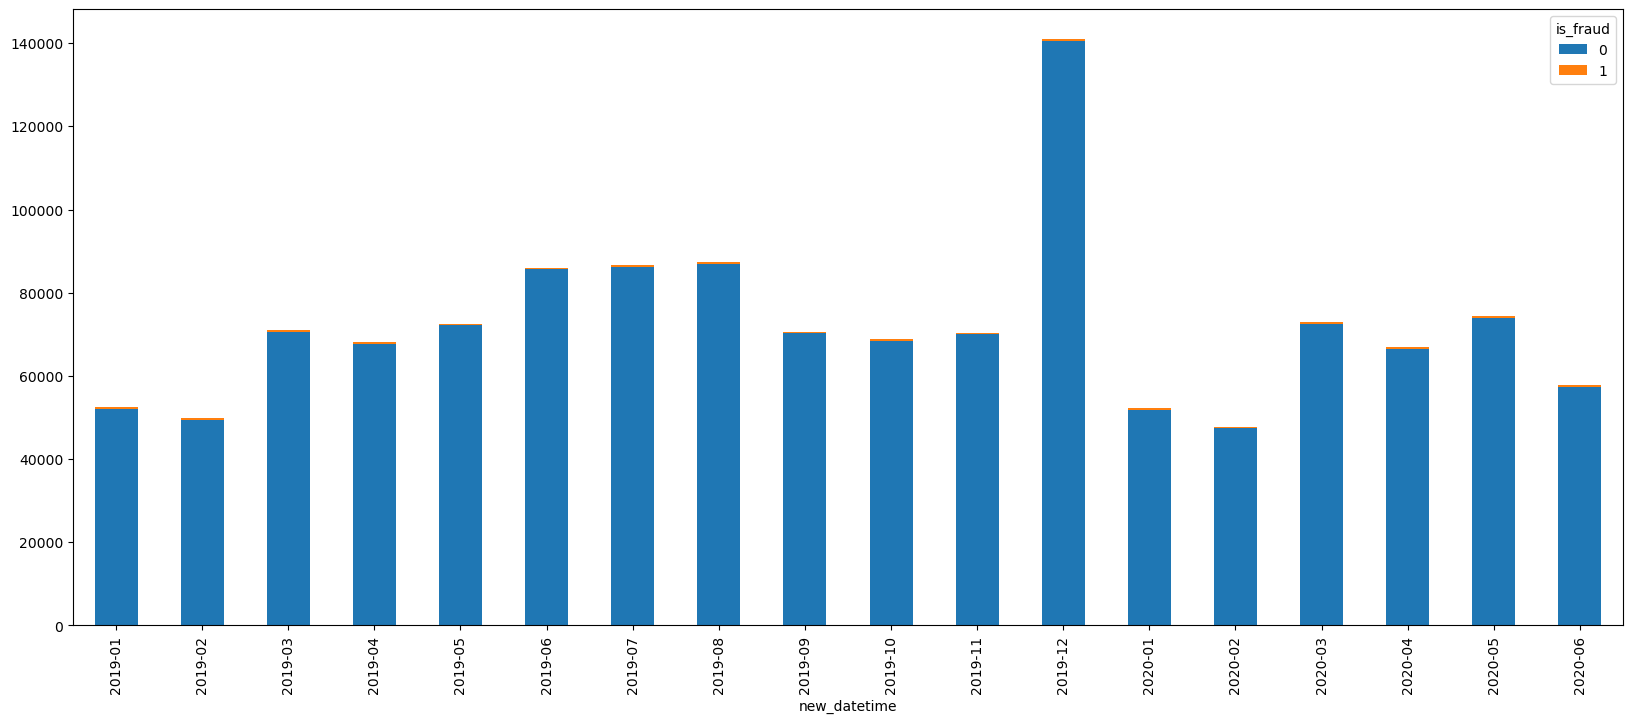

In [25]:
y.plot(kind='bar',figsize=(20,8),stacked=True)

<AxesSubplot: >

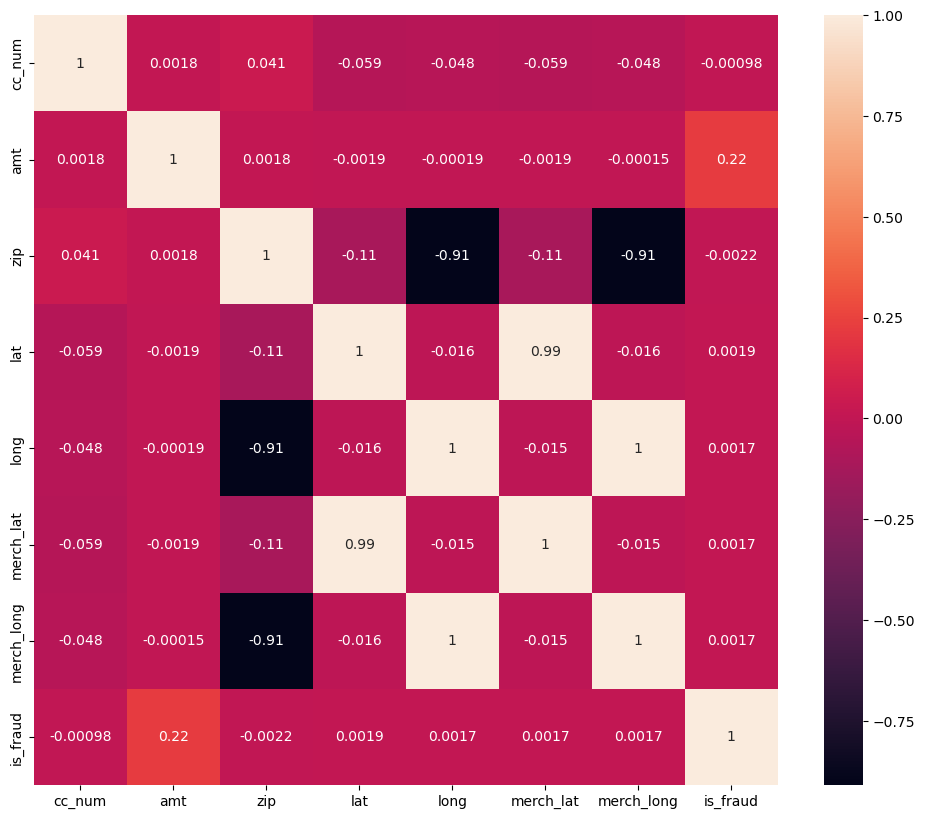

In [26]:
num_cols = df.select_dtypes(include = ['float64','int64'])
plt.figure(figsize=(12,10))
sns.heatmap(num_cols.corr(), annot=True
           )

In [27]:
#dropping few more columns 



In [28]:
#def rescale_column(column):
    #min_value = column.min()
    #max_value = column.max()
    #scaled_column = (column - min_value) / (max_value - min_value)
    #return scaled_column

In [29]:
#df['lat']=rescale_column(df['lat'])
#df['long']=rescale_column(df['long'])
#df['merch_lat']=rescale_column(df['merch_lat'])
#df['merch_long']=rescale_column(df['merch_long'])

In [30]:
X= df.drop(columns=['cc_num', 'zip', 'trans_date_trans_time', 'new_datetime'])
x_train=X.drop(columns=['is_fraud'])

In [31]:
x_train

,merchant,category,amt,gender,city,state,lat,long,merch_lat,merch_long
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,36.011293,-82.048315
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,49.159047,-118.186462
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,43.150704,-112.154481
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,47.034331,-112.561071
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,36.841266,-111.690765
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,38.906881,-78.246528
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,33.619513,-105.130529
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,42.788940,-103.241160


In [32]:
y_train=df['is_fraud']

In [33]:
#x_train=df.drop(columns=['is_fraud'])

In [34]:
x_train=pd.get_dummies(x_train,columns=['merchant', 'category', 'gender', 'city', 'state'])

In [35]:
x_train_new=x_train.iloc[:,:1613]

In [36]:
x_train_new.shape

(1296675, 1613)

In [37]:
df_test=pd.read_csv('fraudTest.csv')

In [38]:
#df_test['lat']=rescale_column(df_test['lat'])
#df_test['long']=rescale_column(df_test['long'])
#df_test['merch_lat']=rescale_column(df_test['merch_lat'])

#df_test['merch_long']=rescale_column(df_test['merch_long'])

In [39]:
df_test.drop(columns=['Unnamed: 0', 'first', 'last', 'job', 'dob', 'trans_num', 'city_pop', 'unix_time', 'street'], axis=1, inplace=True)
                
df_test.drop(columns=['cc_num', 'zip', 'trans_date_trans_time'], inplace=True)


In [40]:
df_test

,merchant,category,amt,gender,city,state,lat,long,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,40.4931,-91.8912,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,44.6255,-116.4493,44.470525,-117.080888,0


In [41]:
df_test.shape

(555719, 11)

In [42]:
y_test = df_test['is_fraud']
x_test=df_test.drop(columns=['is_fraud'])



In [43]:
x_test.shape

(555719, 10)

In [44]:
x_test = pd.get_dummies(x_test, columns=['merchant', 'category', 'gender', 'city', 'state'],dtype=int)

In [45]:
#common_columns = x_train.columns.intersection(x_test.columns)
#X_train_aligned = x_train[common_columns]
#X_test_aligned = x_test[common_columns]
#print(X_train_aligned.shape)
#print(X_test_aligned.shape)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [47]:
#y_train

In [48]:
#X_train_aligned

In [49]:
model = DecisionTreeClassifier()

In [50]:
model.fit(x_train_new,y_train)

DecisionTreeClassifier()

In [51]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [54]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
y_pred=pickled_model.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- city_Craig
- city_Grifton
- city_Guthrie
- city_Kirkwood
- city_Kirtland
- ...
Feature names seen at fit time, yet now missing:
- city_Angwin
- city_Ashland
- city_Beacon
- city_Brookfield
- city_Bruce
- ...

  warnings.warn(message, FutureWarning)


In [55]:
# Accuracy Score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy score : {accuracy*100:.2f}%")

Accuracy score : 93.49%
